# Unir DataFrames con `merge` en pandas
En este trabajo nos basaremos en el ejemplo `nycflights13` del libro 'R for Data Science' de Gareth Grolemund y Hadley Wickham, disponible en línea en https://r4ds.had.co.nz/ o en soporte papel en la editorial O'Reilly (2017).

En su capítulo 13, 'Relational data', usa el [ejemplo](https://r4ds.had.co.nz/relational-data.html#nycflights13-relational) del conjunto de datos de los vuelos que salen de algún aeropuerto de Nueva York en 2013, junto con las condiciones atmosféricas del vuelo. Permiten por ejemplo investigar los retrasos y sus posibles causas.

Consideraremos los cuatros dataframes con relaciones descritas en el siguiente esquema: 


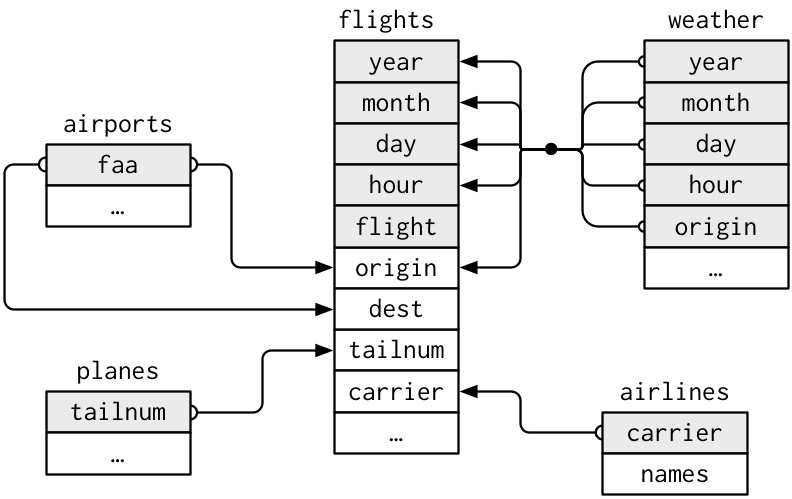

In [2]:
from IPython import display
display.Image('https://multimediarepository.blob.core.windows.net/imagecontainer/caa2fe0f172f4e81abe11c3a52dcab6d.png')
# Imagen de 'R for Data science', capítulo 13, G. Grelemund y H. Wickham, https://r4ds.had.co.nz/

El objetivo es conseguir completar el DataFrame `flights` en un DataFrame llamado `flights_extended` que contenga todos las variables de las tablas de metainformación sobre aviones, compañias, condiciones meteorólicas, aeropuertos. 

Indicar en este bloque de texto qué tipo de `merge` usaréis para unir cada tabla con la tabla `flights` para completarla.

- `flights` con `airports`: 
- `flights` con `airplane`: 
- `flights` con `carrier`: 
- `flights` con  `weather`:

Cuál es el número de filas que esperáis para el DataFrame resultante `flights_extended`?

Cargar los ficheros en formato  `feather` con la instrucción `read_feather` de `pandas` correspondientes a `flights`, `airports`,  `planes`,  `airlines`, y `weather`.


In [3]:
# Completar aquí

import pandas as pd
from os import path
DATA_DIRECTORY = path.join('..', 'data')

airports = pd.read_feather(
    path.join(DATA_DIRECTORY,  'airports.feather'),
)

airlines = pd.read_feather(
    path.join(DATA_DIRECTORY,  'airlines.feather'),
)

planes = pd.read_feather(
    path.join(DATA_DIRECTORY,  'planes.feather'),
)

weather = pd.read_feather(
    path.join(DATA_DIRECTORY,  'weather.feather'),
)

flights = pd.read_feather(
    path.join(DATA_DIRECTORY,  'flights.feather'),
)
# --------------------
weather

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01 01:00:00-05:00
1,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,NaN,0.0,1012.3,10.0,2013-01-01 02:00:00-05:00
2,EWR,2013,1,1,3,39.02,28.04,64.43,240.0,11.50780,NaN,0.0,1012.5,10.0,2013-01-01 03:00:00-05:00
3,EWR,2013,1,1,4,39.92,28.04,62.21,250.0,12.65858,NaN,0.0,1012.2,10.0,2013-01-01 04:00:00-05:00
4,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01 05:00:00-05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26110,LGA,2013,12,30,14,35.96,19.94,51.78,340.0,13.80936,21.86482,0.0,1017.1,10.0,2013-12-30 14:00:00-05:00
26111,LGA,2013,12,30,15,33.98,17.06,49.51,330.0,17.26170,21.86482,0.0,1018.8,10.0,2013-12-30 15:00:00-05:00
26112,LGA,2013,12,30,16,32.00,15.08,49.19,340.0,14.96014,23.01560,0.0,1019.5,10.0,2013-12-30 16:00:00-05:00
26113,LGA,2013,12,30,17,30.92,12.92,46.74,320.0,17.26170,NaN,0.0,1019.9,10.0,2013-12-30 17:00:00-05:00


Construir el DataFrame `flights_extended` secuencialmente, cambiando los nombres de columnas cuando es oportuno, uniendo `flights` con  `airports`,  `planes`,  `airlines`, y `weather`.

In [4]:
# Completar aquí: construir flights_aiports que contenga el merge de flights con airports tanto para origin como para destination

flights_airports = flights.merge(airports.rename(columns={'faa': 'faa_origin', 'name': 'name_origin', 'lat': 'lat_origin', 'lon': 'lon_origin', 'alt': 'alt_origin', 'tz': 'tz_origin', 'dst': 'dst_origin', 'tzone': 'tzone_origin'}), how='left', left_on='origin', right_on='faa_origin')

flights_airports = flights_airports.merge(airports.rename(columns={'faa': 'faa_dest', 'name': 'name_dest', 'lat': 'lat_dest', 'lon': 'lon_dest', 'alt': 'alt_dest', 'tz': 'tz_dest', 'dst': 'dst_dest', 'tzone': 'tzone_dest'}), how='left', left_on='dest', right_on='faa_dest')


# --------------------
flights_airports

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,dst_origin,tzone_origin,faa_dest,name_dest,lat_dest,lon_dest,alt_dest,tz_dest,dst_dest,tzone_dest
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,A,America/New_York,IAH,George Bush Intercontinental,29.984433,-95.341442,97.0,-6.0,A,America/Chicago
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,A,America/New_York,IAH,George Bush Intercontinental,29.984433,-95.341442,97.0,-6.0,A,America/Chicago
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,A,America/New_York,MIA,Miami Intl,25.793250,-80.290556,8.0,-5.0,A,America/New_York
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,A,America/New_York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,A,America/New_York,ATL,Hartsfield Jackson Atlanta Intl,33.636719,-84.428067,1026.0,-5.0,A,America/New_York
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,...,A,America/New_York,DCA,Ronald Reagan Washington Natl,38.852083,-77.037722,15.0,-5.0,A,America/New_York
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,...,A,America/New_York,SYR,Syracuse Hancock Intl,43.111187,-76.106311,421.0,-5.0,A,America/New_York
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,...,A,America/New_York,BNA,Nashville Intl,36.124472,-86.678194,599.0,-6.0,A,America/Chicago
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,...,A,America/New_York,CLE,Cleveland Hopkins Intl,41.411689,-81.849794,791.0,-5.0,A,America/New_York


In [5]:
# Completar aquí: comprobad las columnas de flights_airports
print(flights_airports.columns)
# --------------------


Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour', 'faa_origin', 'name_origin', 'lat_origin', 'lon_origin',
       'alt_origin', 'tz_origin', 'dst_origin', 'tzone_origin', 'faa_dest',
       'name_dest', 'lat_dest', 'lon_dest', 'alt_dest', 'tz_dest', 'dst_dest',
       'tzone_dest'],
      dtype='object')


In [6]:
# Completar aquí: construir flights_aiports_planes_airlines que contenga el merge de flights_airports con planes y airlinesdestination

flights_airports_planes_airlines = flights_airports.merge(planes.rename(columns={'year': 'year_plane'}), how='left', left_on='tailnum', right_on='tailnum')

flights_airports_planes_airlines = flights_airports_planes_airlines.merge(airlines.rename(columns={'name': 'name_carrier'}), how='left', left_on='carrier', right_on='carrier')


# --------------------
flights_airports_planes_airlines

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tzone_dest,year_plane,type,manufacturer,model,engines,seats,speed,engine,name_carrier
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,America/Chicago,1999.0,Fixed wing multi engine,BOEING,737-824,2.0,149.0,NaN,Turbo-fan,United Air Lines Inc.
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,America/Chicago,1998.0,Fixed wing multi engine,BOEING,737-824,2.0,149.0,NaN,Turbo-fan,United Air Lines Inc.
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,America/New_York,1990.0,Fixed wing multi engine,BOEING,757-223,2.0,178.0,NaN,Turbo-fan,American Airlines Inc.
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,NaN,2012.0,Fixed wing multi engine,AIRBUS,A320-232,2.0,200.0,NaN,Turbo-fan,JetBlue Airways
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,America/New_York,1991.0,Fixed wing multi engine,BOEING,757-232,2.0,178.0,NaN,Turbo-fan,Delta Air Lines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,...,America/New_York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,...,America/New_York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,...,America/Chicago,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Envoy Air
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,...,America/New_York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Envoy Air


In [7]:
# Completar aquí: comprobad las columnas de fligths_airports_planes_airlines
print(flights_airports_planes_airlines.columns)
# --------------------


Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour', 'faa_origin', 'name_origin', 'lat_origin', 'lon_origin',
       'alt_origin', 'tz_origin', 'dst_origin', 'tzone_origin', 'faa_dest',
       'name_dest', 'lat_dest', 'lon_dest', 'alt_dest', 'tz_dest', 'dst_dest',
       'tzone_dest', 'year_plane', 'type', 'manufacturer', 'model', 'engines',
       'seats', 'speed', 'engine', 'name_carrier'],
      dtype='object')


Finalmente, construid `flights_extended` que contenga también la información meteorológica en el aeropuerto de origen

In [8]:
# Completar aquí

flights_extended = flights_airports_planes_airlines.merge(weather, how='left', left_on=['origin','year','month','day','hour','time_hour'], right_on=['origin','year','month','day','hour','time_hour'])



# --------------------
flights_extended

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,name_carrier,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,United Air Lines Inc.,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,United Air Lines Inc.,39.92,24.98,54.81,250.0,14.96014,21.86482,0.0,1011.4,10.0
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,American Airlines Inc.,39.02,26.96,61.63,260.0,14.96014,NaN,0.0,1012.1,10.0
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,JetBlue Airways,39.02,26.96,61.63,260.0,14.96014,NaN,0.0,1012.1,10.0
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,Delta Air Lines Inc.,39.92,24.98,54.81,260.0,16.11092,23.01560,0.0,1011.7,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,...,Endeavor Air Inc.,68.00,55.04,63.21,190.0,11.50780,NaN,0.0,1016.6,10.0
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,...,Endeavor Air Inc.,64.94,53.06,65.37,200.0,6.90468,NaN,0.0,1015.8,10.0
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,...,Envoy Air,69.08,48.02,46.99,70.0,5.75390,NaN,0.0,1016.7,10.0
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,...,Envoy Air,66.92,48.92,52.35,70.0,8.05546,NaN,0.0,1017.5,10.0


In [9]:
# Completar aquí: comprobad las columnas
print(flights_extended.columns)
# --------------------


Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour', 'faa_origin', 'name_origin', 'lat_origin', 'lon_origin',
       'alt_origin', 'tz_origin', 'dst_origin', 'tzone_origin', 'faa_dest',
       'name_dest', 'lat_dest', 'lon_dest', 'alt_dest', 'tz_dest', 'dst_dest',
       'tzone_dest', 'year_plane', 'type', 'manufacturer', 'model', 'engines',
       'seats', 'speed', 'engine', 'name_carrier', 'temp', 'dewp', 'humid',
       'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib'],
      dtype='object')


In [10]:
# Completar aquí: comprobad la dimensión de flights_extended
flights_extended.shape
# --------------------


(336776, 53)